# Customer Churn Prediction Analysis

## 1. Import Required Libraries

We'll start by importing all the necessary libraries for data manipulation, visualization, and machine learning:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

## 2. Data Loading and Initial Exploration {#data-loading}

Let's load the dataset and take a first look at the structure and content of our data:

In [4]:
# Load dataset
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# See the first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [3]:
# See basic info
df.info()

# See missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 3. Data Preprocessing {#data-preprocessing}

### Handling Data Type Issues and Missing Values

Let's investigate and fix any data type issues, particularly with the 'TotalCharges' column:

In [4]:
# Convert 'TotalCharges' to numeric, some rows may be blank
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check again for missing values
df.isnull().sum()

# Drop rows with missing TotalCharges
df = df.dropna()

# Check shapes
df.shape

(7032, 21)

Text(0.5, 1.0, 'Churn by Contract Type')

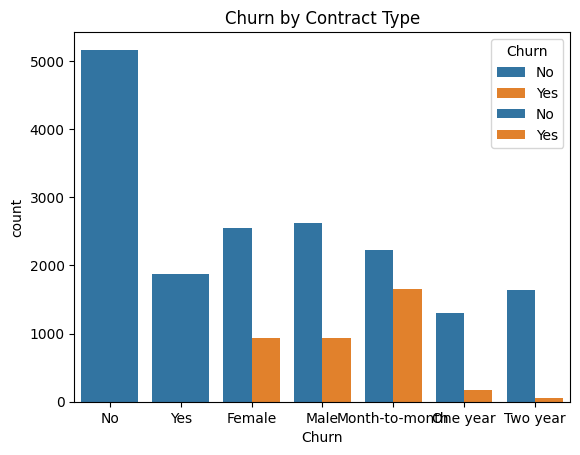

In [5]:
# Plot churn count
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")

# Plot churn by gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")

# Plot churn by Contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")

In [ ]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model and print comprehensive metrics"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    print(f"\n=== {model_name} Performance ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    
    if y_pred_proba is not None:
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return y_pred

# Evaluate both models
lr_predictions = evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression")
svm_predictions = evaluate_model(svm_model, X_test_scaled, y_test, "Support Vector Machine")


In [ ]:
# Model comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('SVM - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Performance comparison summary
models_performance = {
    'Model': ['Logistic Regression', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, lr_predictions),
        accuracy_score(y_test, svm_predictions)
    ],
    'Precision': [
        precision_score(y_test, lr_predictions),
        precision_score(y_test, svm_predictions)
    ],
    'Recall': [
        recall_score(y_test, lr_predictions),
        recall_score(y_test, svm_predictions)
    ],
    'F1-Score': [
        f1_score(y_test, lr_predictions),
        f1_score(y_test, svm_predictions)
    ]
}

comparison_df = pd.DataFrame(models_performance)
print("\n=== Model Performance Comparison ===")
print(comparison_df.round(4))


## 5. Model Building and Training {#modeling}

### Feature Engineering and Data Preparation

Before building our machine learning models, we need to prepare the data by encoding categorical variables and preparing features:

In [ ]:
# Drop customerID (not useful)
df.drop('customerID', axis=1, inplace=True)

# Convert 'Yes'/'No' to 1/0 for 'Churn'
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# One-hot encode other categorical columns
df = pd.get_dummies(df, drop_first=True)

# See new columns
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

# Feature scaling (important for SVM and Logistic Regression)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")


In [ ]:
# Train Logistic Regression model
print("Training Logistic Regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Train SVM model  
print("Training SVM model...")
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

print("Model training completed!")


In [7]:
# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create and train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test)

d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Create and train SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

In [10]:
# Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_lr))

# SVM
print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_svm))

Logistic Regression:
Accuracy: 0.7874911158493249
Precision: 0.6205787781350482
Recall: 0.516042780748663
F1 Score: 0.5635036496350365
ROC AUC: 0.8320840084691802
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


SVM:
Accuracy: 0.7341862117981521
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


ROC AUC: 0.7878097644056303
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

In [11]:
# Pick a random customer from test set
sample = X_test.iloc[0]

# Predict churn (Logistic Regression)
result = log_reg.predict([sample])
print("Will churn (Logistic Regression):", result)

# Predict churn (SVM)
result_svm = svm.predict([sample])
print("Will churn (SVM):", result_svm)

Will churn (Logistic Regression): [0]
Will churn (SVM): [0]


d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
